# Titanic Kaggle Machine Learning Practice
Space to test machine learning models and classic problem

In [49]:
!pip install pyarrow
#Imports
import pandas as pd
import pyarrow
import sklearn

You should consider upgrading via the 'c:\users\jason.huang\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
gender = pd.read_csv(r'C:\Users\jason.huang\Documents\Personal\DS\datasets\titanic\gender_submission.csv')
test = pd.read_csv(r'C:\Users\jason.huang\Documents\Personal\DS\datasets\titanic\test.csv')
train = pd.read_csv(r'C:\Users\jason.huang\Documents\Personal\DS\datasets\titanic\train.csv')

In [11]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
#Fares
#Check NaN - 0
train['Fare'].isnull().sum()
#Check Zero - 15 $0 dollar fees
checkZero = train['Fare'] == 0
checkZeroFare = train[checkZero]
checkZeroFare.Fare.count()

fares = train['Fare']
fares.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

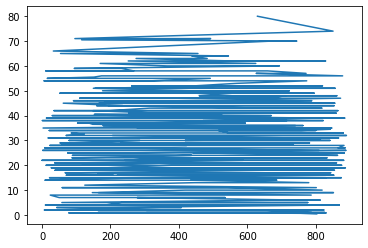

In [42]:
#Age 
#Check NaN - 177
train['Age'].isnull().sum()
#Check Zero - 0
checkZero = train['Age'] == 0
checkZeroAge = train[checkZero]
checkZeroAge.Age.count()


ages = train['Age']
ages.describe()
agesSorted = ages.sort_values(ascending=True, na_position='first')
agesSorted.plot()

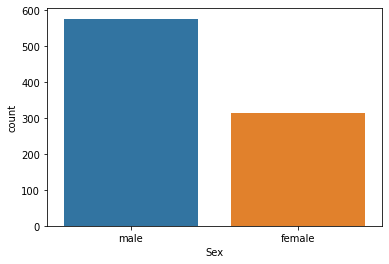

In [46]:
#Sex
#Check NaN - 0
train['Sex'].isnull().sum()
sex = train['Sex']
import seaborn as sns
ax = sns.countplot(x='Sex', data=train)

In [56]:
#Extract feature columns
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
#Extract target columns
target_cols = ['Survived']

train_features = train[feature_cols]
train_target = train[target_cols]


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

model.fit(train_features, train_target)

ValueError: could not convert string to float: 'male'